In [201]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyodbc 

In [202]:
# Load the CSV file
data = pd.read_csv(r"C:\Users\bobby\Desktop\Python\Global Youtube Statistics 2023\Global YouTube Statistics.csv", encoding= 'windows-1252')
data.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [267]:
# Inspect unecessary characters from the column
data.columns

Index(['Youtuber', 'Subscribers', 'Video_Views', 'Category', 'Uploads',
       'Country', 'Channel_Type', 'Video_Views_Rank', 'Country_Rank',
       'Channel_Type_Rank', 'Video_Views_For_The_Last_30_Days',
       'Lowest_Monthly_Earnings', 'Highest_Monthly_Earnings',
       'Lowest_Yearly_Earnings', 'Highest_Yearly_Earnings',
       'Subscribers_For_Last_30_Days', 'Gross_Tertiary_Education_Enrollment',
       'Population', 'Unemployment_Rate', 'Urban_Population', 'Latitude',
       'Longitude', 'Date'],
      dtype='object')

### Data Cleaning

In [203]:
# Replace uncessary characters on each column title
data.columns = data.columns.str.replace(' ','_')  
data.columns = data.columns.str.replace(' (%)','')  
data.columns = data.columns.str.replace('_(%)','')  
data.columns = data.columns.str.title()

In [204]:
data.columns

Index(['Rank', 'Youtuber', 'Subscribers', 'Video_Views', 'Category', 'Title',
       'Uploads', 'Country', 'Abbreviation', 'Channel_Type',
       'Video_Views_Rank', 'Country_Rank', 'Channel_Type_Rank',
       'Video_Views_For_The_Last_30_Days', 'Lowest_Monthly_Earnings',
       'Highest_Monthly_Earnings', 'Lowest_Yearly_Earnings',
       'Highest_Yearly_Earnings', 'Subscribers_For_Last_30_Days',
       'Created_Year', 'Created_Month', 'Created_Date',
       'Gross_Tertiary_Education_Enrollment', 'Population',
       'Unemployment_Rate', 'Urban_Population', 'Latitude', 'Longitude'],
      dtype='object')

In [206]:
data = data[['Youtuber', 'Subscribers', 'Video_Views', 'Category', 'Title',
       'Uploads', 'Country', 'Abbreviation', 'Channel_Type',
       'Video_Views_Rank', 'Country_Rank', 'Channel_Type_Rank',
       'Video_Views_For_The_Last_30_Days', 'Lowest_Monthly_Earnings',
       'Highest_Monthly_Earnings', 'Lowest_Yearly_Earnings',
       'Highest_Yearly_Earnings', 'Subscribers_For_Last_30_Days',
       'Created_Year', 'Created_Month', 'Created_Date',
       'Gross_Tertiary_Education_Enrollment', 'Population',
       'Unemployment_Rate', 'Urban_Population', 'Latitude', 'Longitude']]

In [207]:
#list all object columns in the data
[ col for col, dt in data.dtypes.items() if dt == object] 


['Youtuber',
 'Category',
 'Title',
 'Country',
 'Abbreviation',
 'Channel_Type',
 'Created_Month']

In [208]:
data[[
 'Youtuber',
 'Category',
 'Title',
 'Country',
 'Abbreviation',
 'Channel_Type',
 'Created_Month']]

,Youtuber,Category,Title,Country,Abbreviation,Channel_Type,Created_Month
0,T-Series,Music,T-Series,India,IN,Music,Mar
1,YouTube Movies,Film & Animation,youtubemovies,United States,US,Games,Mar
2,MrBeast,Entertainment,MrBeast,United States,US,Entertainment,Feb
3,Cocomelon - Nursery Rhymes,Education,Cocomelon - Nursery Rhymes,United States,US,Education,Sep
4,SET India,Shows,SET India,India,IN,Entertainment,Sep
...,...,...,...,...,...,...,...
990,Natan por Aï¿,Sports,Natan por Aï¿,Brazil,BR,Entertainment,Feb
991,Free Fire India Official,People & Blogs,Free Fire India Official,India,IN,Games,Sep
992,Panda,NaN,HybridPanda,United Kingdom,GB,Games,Sep
993,RobTopGames,Gaming,RobTopGames,Sweden,SE,Games,May


In [209]:
# Drop duplicate columns, 
# In this case, Youtuber and title has the same category values. 
# Abbreviation also is not necessary since there is already the country column
data = data[['Youtuber', 'Subscribers', 'Video_Views', 'Category',
       'Uploads', 'Country', 'Channel_Type',
       'Video_Views_Rank', 'Country_Rank', 'Channel_Type_Rank',
       'Video_Views_For_The_Last_30_Days', 'Lowest_Monthly_Earnings',
       'Highest_Monthly_Earnings', 'Lowest_Yearly_Earnings',
       'Highest_Yearly_Earnings', 'Subscribers_For_Last_30_Days',
       'Created_Year', 'Created_Month', 'Created_Date',
       'Gross_Tertiary_Education_Enrollment', 'Population',
       'Unemployment_Rate', 'Urban_Population', 'Latitude', 'Longitude']]

In [210]:
data.head()

,Youtuber,Subscribers,Video_Views,Category,Uploads,Country,Channel_Type,Video_Views_Rank,Country_Rank,Channel_Type_Rank,...,Subscribers_For_Last_30_Days,Created_Year,Created_Month,Created_Date,Gross_Tertiary_Education_Enrollment,Population,Unemployment_Rate,Urban_Population,Latitude,Longitude
0,T-Series,245000000,2.280000e+11,Music,20082,India,Music,1.0,1.0,1.0,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,YouTube Movies,170000000,0.000000e+00,Film & Animation,1,United States,Games,4055159.0,7670.0,7423.0,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,MrBeast,166000000,2.836884e+10,Entertainment,741,United States,Entertainment,48.0,1.0,1.0,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,966,United States,Education,2.0,2.0,1.0,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,SET India,159000000,1.480000e+11,Shows,116536,India,Entertainment,3.0,2.0,2.0,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [211]:
#list all the object column
object_column = [ col for col, dt in data.dtypes.items() if dt == object] 

In [28]:
# Replace underscore character with space for each object column
data['Youtuber'] = data['Youtuber'].str.replace('_', ' ')
data['Category'] = data['Category'].str.replace('_', ' ')
data['Country'] = data['Country'].str.replace('_', ' ')
data['Channel_Type'] = data['Channel_Type'].str.replace('_', ' ')
data['Created_Month'] = data['Created_Month'].str.replace('_', ' ')

In [212]:
# Capitalize each word for each object column
data['Youtuber'] = data['Youtuber'].str.title()
data['Category'] = data['Category'].str.title()
data['Country'] = data['Country'].str.title()
data['Channel_Type'] = data['Channel_Type'].str.title()
data['Created_Month'] = data['Created_Month'].str.title()

In [213]:
# Check if the format is good
data.loc[:, object_column] 

,Youtuber,Category,Country,Channel_Type,Created_Month
0,T-Series,Music,India,Music,Mar
1,Youtube Movies,Film & Animation,United States,Games,Mar
2,Mrbeast,Entertainment,United States,Entertainment,Feb
3,Cocomelon - Nursery Rhymes,Education,United States,Education,Sep
4,Set India,Shows,India,Entertainment,Sep
...,...,...,...,...,...
990,Natan Por Aï¿,Sports,Brazil,Entertainment,Feb
991,Free Fire India Official,People & Blogs,India,Games,Sep
992,Panda,NaN,United Kingdom,Games,Sep
993,Robtopgames,Gaming,Sweden,Games,May


In [214]:
# Check if there are any duplicate rows
data.duplicated().any() 

False

In [215]:
#list all the numeric column
numeric_column = [ col for col, dt in data.dtypes.items() if ((dt == int) | (dt == float))] 
numeric_column

['Video_Views',
 'Video_Views_Rank',
 'Country_Rank',
 'Channel_Type_Rank',
 'Video_Views_For_The_Last_30_Days',
 'Lowest_Monthly_Earnings',
 'Highest_Monthly_Earnings',
 'Lowest_Yearly_Earnings',
 'Highest_Yearly_Earnings',
 'Subscribers_For_Last_30_Days',
 'Created_Year',
 'Created_Date',
 'Gross_Tertiary_Education_Enrollment',
 'Population',
 'Unemployment_Rate',
 'Urban_Population',
 'Latitude',
 'Longitude']

#### Detecting Outliers

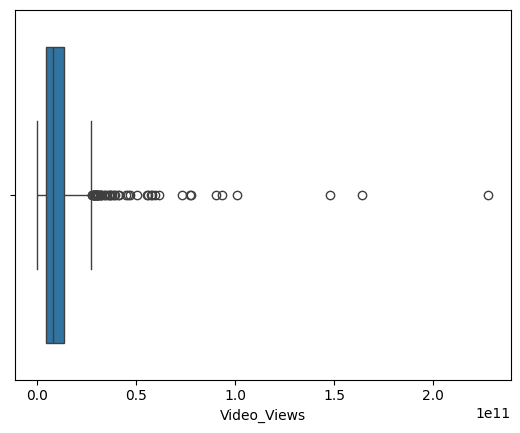

In [216]:
# IQR rule to use for the skewed distribution
q25, q75 = np.percentile(data['Video_Views'], (25,75))
iqr = q75 - q25 
min_1 = q25 - 1.5*iqr 
max_1 = q75 + 1.5*iqr
sns.boxplot(x=data['Video_Views']);

In [217]:
# Show some of the outliers in the video views
data['Video_Views'].loc[data['Video_Views'] > max_1].head()  

0    2.280000e+11
2    2.836884e+10
3    1.640000e+11
4    1.480000e+11
6    9.324704e+10
Name: Video_Views, dtype: float64

* In this case, we will retain these values since they are valid number of video views in youtube

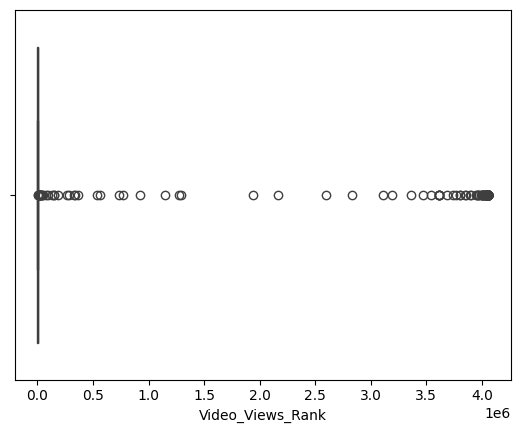

In [218]:
q25, q75 = np.percentile(data['Video_Views_Rank'], (25,75))
iqr = q75 - q25 
min_2 = q25 - 1.5*iqr 
max_2 = q75 + 1.5*iqr
sns.boxplot(x=data['Video_Views_Rank']);

In [219]:
data.loc[data['Video_Views_Rank'] > max_2]

,Youtuber,Subscribers,Video_Views,Category,Uploads,Country,Channel_Type,Video_Views_Rank,Country_Rank,Channel_Type_Rank,...,Subscribers_For_Last_30_Days,Created_Year,Created_Month,Created_Date,Gross_Tertiary_Education_Enrollment,Population,Unemployment_Rate,Urban_Population,Latitude,Longitude


* There are no outliers present in the video views rank

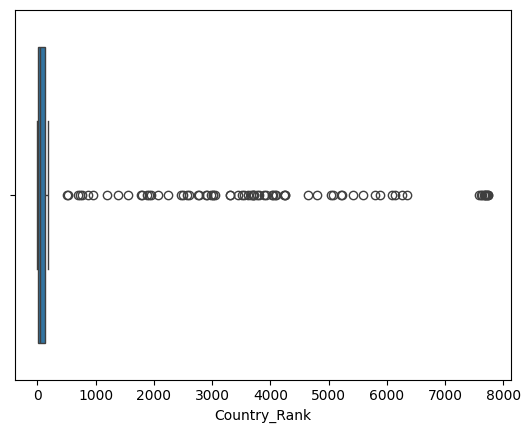

In [220]:
q25, q75 = np.percentile(data['Country_Rank'], (25,75))
iqr = q75 - q25 
min_3 = q25 - 1.5*iqr 
max_3 = q75 + 1.5*iqr
sns.boxplot(x=data['Country_Rank']);

In [221]:
data.loc[data['Country_Rank'] > max_3] 

,Youtuber,Subscribers,Video_Views,Category,Uploads,Country,Channel_Type,Video_Views_Rank,Country_Rank,Channel_Type_Rank,...,Subscribers_For_Last_30_Days,Created_Year,Created_Month,Created_Date,Gross_Tertiary_Education_Enrollment,Population,Unemployment_Rate,Urban_Population,Latitude,Longitude


* There are no outliers present in the country rank

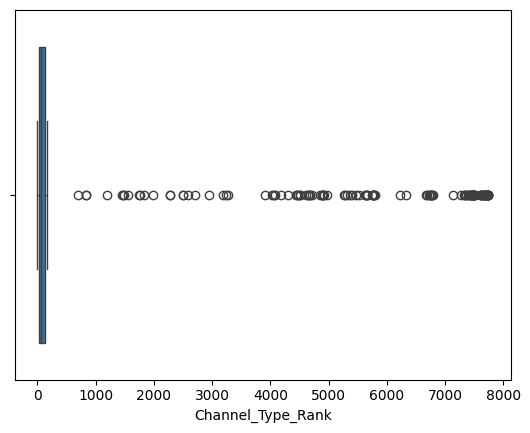

In [222]:
q25, q75 = np.percentile(data['Channel_Type_Rank'], (25,75))
iqr = q75 - q25 
min_4 = q25 - 1.5*iqr
max_4 = q75 + 1.5*iqr
sns.boxplot(x=data['Channel_Type_Rank']);

In [223]:
data.loc[data['Channel_Type_Rank'] > max_4] 

,Youtuber,Subscribers,Video_Views,Category,Uploads,Country,Channel_Type,Video_Views_Rank,Country_Rank,Channel_Type_Rank,...,Subscribers_For_Last_30_Days,Created_Year,Created_Month,Created_Date,Gross_Tertiary_Education_Enrollment,Population,Unemployment_Rate,Urban_Population,Latitude,Longitude


* There are no outliers present in the Channel Type Rank

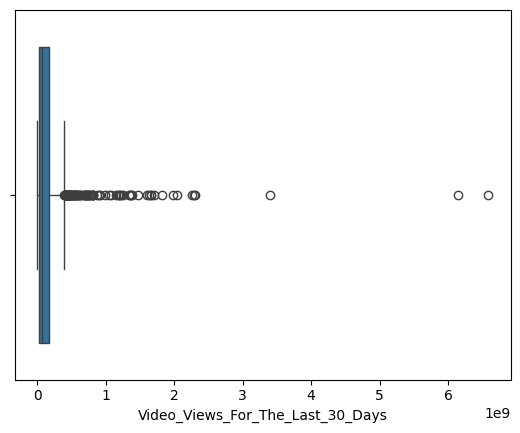

In [225]:
q25, q75 = np.percentile(data['Video_Views_For_The_Last_30_Days'], (25,75))
iqr = q75 - q25 
min_5 = q25 - 1.5*iqr
max_5 = q75 + 1.5*iqr
sns.boxplot(x=data['Video_Views_For_The_Last_30_Days']);

In [226]:
data.loc[data['Video_Views_For_The_Last_30_Days'] > max_5] 

,Youtuber,Subscribers,Video_Views,Category,Uploads,Country,Channel_Type,Video_Views_Rank,Country_Rank,Channel_Type_Rank,...,Subscribers_For_Last_30_Days,Created_Year,Created_Month,Created_Date,Gross_Tertiary_Education_Enrollment,Population,Unemployment_Rate,Urban_Population,Latitude,Longitude


* No outliers in this column

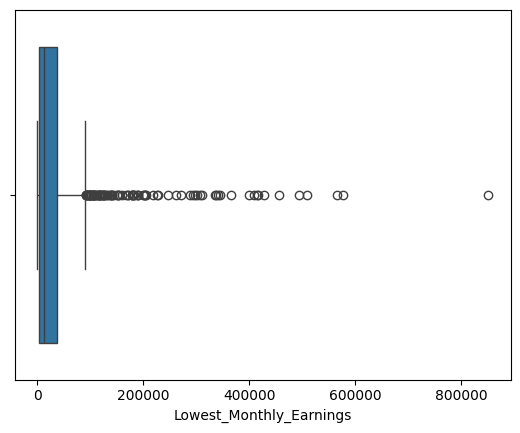

In [227]:
q25, q75 = np.percentile(data['Lowest_Monthly_Earnings'], (25,75))
iqr = q75 - q25 
min_6 = q25 - 1.5*iqr
max_6 = q75 + 1.5*iqr
sns.boxplot(x=data['Lowest_Monthly_Earnings']);

In [228]:
data['Lowest_Monthly_Earnings'].loc[data['Lowest_Monthly_Earnings'] > max_6] 


0      564600.0
2      337000.0
3      493800.0
4      455900.0
6      182900.0
         ...   
858     99400.0
905    270300.0
908     92100.0
970    225900.0
990    138100.0
Name: Lowest_Monthly_Earnings, Length: 99, dtype: float64

* We will retain this outliers since it is almost 10% of the total values and also these outliers are valid youtube earnings. 

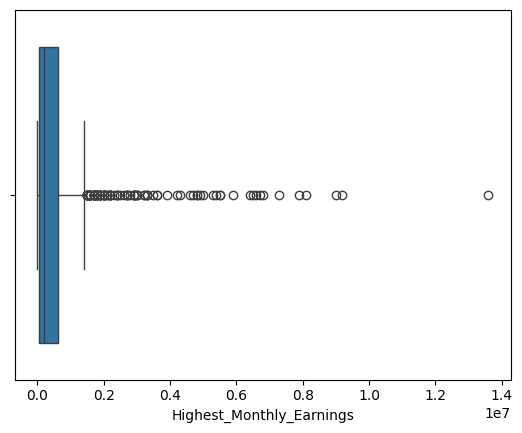

In [229]:
q25, q75 = np.percentile(data['Highest_Monthly_Earnings'], (25,75))
iqr = q75 - q25 
min_7 = q25 - 1.5*iqr
max_7 = q75 + 1.5*iqr
sns.boxplot(x=data['Highest_Monthly_Earnings']);

In [230]:
data['Highest_Monthly_Earnings'].loc[data['Highest_Monthly_Earnings'] > max_7] 


0      9000000.0
2      5400000.0
3      7900000.0
4      7300000.0
6      2900000.0
         ...    
858    1600000.0
905    4300000.0
908    1500000.0
970    3600000.0
990    2200000.0
Name: Highest_Monthly_Earnings, Length: 99, dtype: float64

* We will also retain this outliers since it is almost 10% of the total values and also these outliers are valid youtube earnings. 

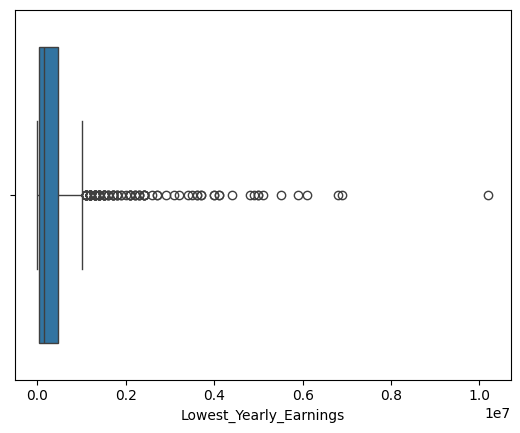

In [231]:
q25, q75 = np.percentile(data['Lowest_Yearly_Earnings'], (25,75))
iqr = q75 - q25 
min_8 = q25 - 1.5*iqr
max_8 = q75 + 1.5*iqr
sns.boxplot(x=data['Lowest_Yearly_Earnings']);

In [232]:
data['Lowest_Yearly_Earnings'].loc[data['Lowest_Yearly_Earnings'] > max_8] 

0      6800000.0
2      4000000.0
3      5900000.0
4      5500000.0
6      2200000.0
         ...    
858    1200000.0
905    3200000.0
908    1100000.0
970    2700000.0
990    1700000.0
Name: Lowest_Yearly_Earnings, Length: 102, dtype: float64

* We will also retain this outliers since it is almost 10% of the total values and also these outliers are valid youtube earnings. 

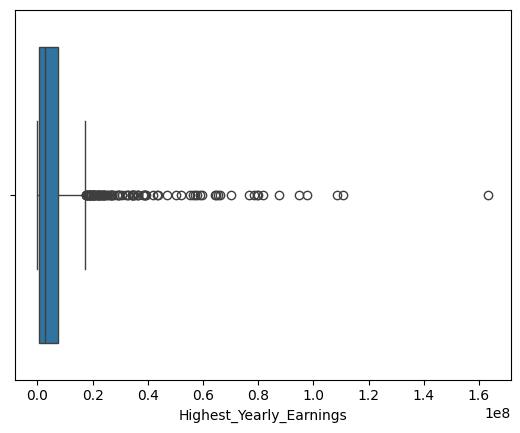

In [233]:
q25, q75 = np.percentile(data['Highest_Yearly_Earnings'], (25,75))
iqr = q75 - q25 
min_9 = q25 - 1.5*iqr
max_9 = q75 + 1.5*iqr
sns.boxplot(x=data['Highest_Yearly_Earnings']);

In [234]:
data['Highest_Yearly_Earnings'].loc[data['Highest_Yearly_Earnings'] > max_9]

0      108400000.0
2       64700000.0
3       94800000.0
4       87500000.0
6       35100000.0
          ...     
858     19100000.0
905     51900000.0
908     17700000.0
970     43400000.0
990     26500000.0
Name: Highest_Yearly_Earnings, Length: 99, dtype: float64

* We will also retain this outliers since it is almost 10% of the total values and also these outliers are valid youtube earnings. 

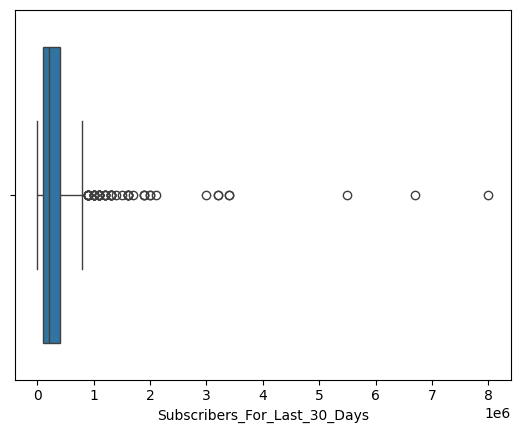

In [235]:
q25, q75 = np.percentile(data['Subscribers_For_Last_30_Days'], (25,75))
iqr = q75 - q25 
min_10 = q25 - 1.5*iqr
max_10 = q75 + 1.5*iqr
sns.boxplot(x=data['Subscribers_For_Last_30_Days']);

In [236]:
data['Subscribers_For_Last_30_Days'].loc[data['Subscribers_For_Last_30_Days'] > max_10]

Series([], Name: Subscribers_For_Last_30_Days, dtype: float64)

* No outliers

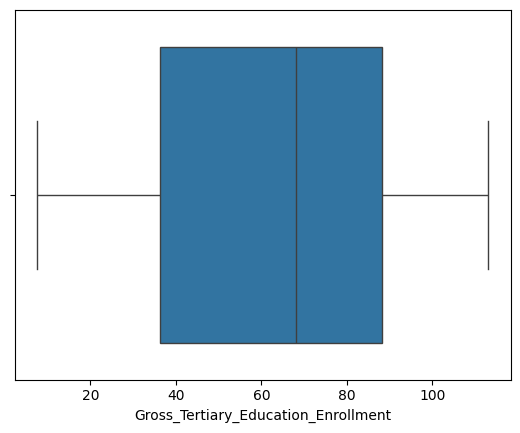

In [237]:
sns.boxplot(x=data['Gross_Tertiary_Education_Enrollment']);

In [238]:
data['Gross_Tertiary_Education_Enrollment'].loc[data['Gross_Tertiary_Education_Enrollment']>100]

191    113.1
247    113.1
373    113.1
478    113.1
508    113.1
522    113.1
526    113.1
706    113.1
785    113.1
Name: Gross_Tertiary_Education_Enrollment, dtype: float64

* There is/are data that is greater than 100%, we will replace it by 100% since 100% is the max percentage value

In [239]:
data['Gross_Tertiary_Education_Enrollment'] = np.where(data['Gross_Tertiary_Education_Enrollment']>100, 100, data['Gross_Tertiary_Education_Enrollment'])

In [240]:
data['Gross_Tertiary_Education_Enrollment'].loc[data['Gross_Tertiary_Education_Enrollment']==100]

191    100.0
247    100.0
373    100.0
478    100.0
508    100.0
522    100.0
526    100.0
706    100.0
785    100.0
Name: Gross_Tertiary_Education_Enrollment, dtype: float64

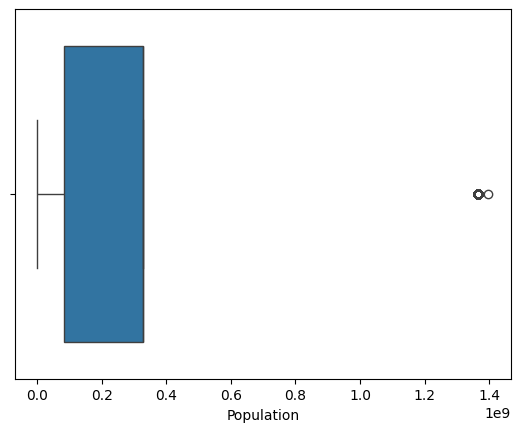

In [241]:
sns.boxplot(x=data['Population']);
q25, q75 = np.percentile(data['Population'], (25,75))
iqr = q75 - q25 
min_11 = q25 - 1.5*iqr
max_11 = q75 + 1.5*iqr

In [242]:
data['Population'].loc[data['Population'] > max_11]

Series([], Name: Population, dtype: float64)

* No outliers

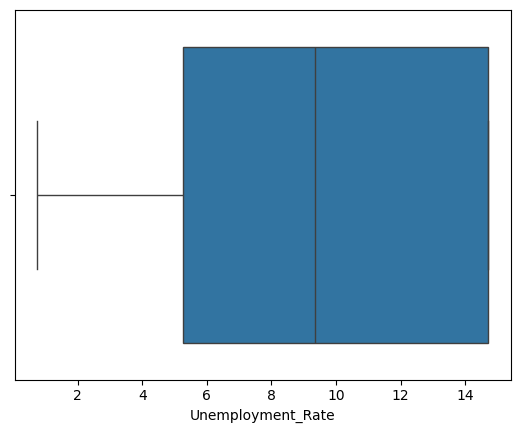

In [243]:
sns.boxplot(x=data['Unemployment_Rate']);
q25, q75 = np.percentile(data['Unemployment_Rate'], (25,75))
iqr = q75 - q25 
min_12 = q25 - 1.5*iqr
max_12 = q75 + 1.5*iqr

* No outliers 

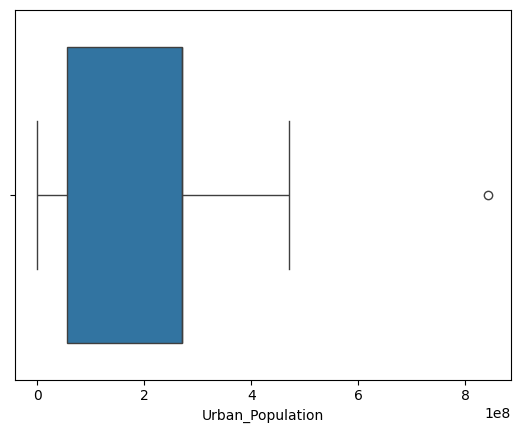

In [244]:
sns.boxplot(x=data['Urban_Population']);
q25, q75 = np.percentile(data['Urban_Population'], (25,75))
iqr = q75 - q25 
min_13 = q25 - 1.5*iqr
max_13 = q75 + 1.5*iqr

In [245]:
data['Urban_Population'].loc[data['Urban_Population'] > max_13]

Series([], Name: Urban_Population, dtype: float64)

* No outliers

### Handling Null Values

In [246]:
# return all columns with count of null values
data.isna().sum()

Youtuber                                 0
Subscribers                              0
Video_Views                              0
Category                                46
Uploads                                  0
Country                                122
Channel_Type                            30
Video_Views_Rank                         1
Country_Rank                           116
Channel_Type_Rank                       33
Video_Views_For_The_Last_30_Days        56
Lowest_Monthly_Earnings                  0
Highest_Monthly_Earnings                 0
Lowest_Yearly_Earnings                   0
Highest_Yearly_Earnings                  0
Subscribers_For_Last_30_Days           337
Created_Year                             5
Created_Month                            5
Created_Date                             5
Gross_Tertiary_Education_Enrollment    123
Population                             123
Unemployment_Rate                      123
Urban_Population                       123
Latitude   

In [247]:
# Drop rows with nan values on the date columns
data.dropna(subset=['Created_Year', 'Created_Month', 'Created_Date'], inplace = True)

In [248]:
# return category and NaN values with their unique count
data['Category'].value_counts(dropna=False)

Category
Entertainment            240
Music                    200
People & Blogs           131
Gaming                    93
Comedy                    69
Film & Animation          46
NaN                       46
Education                 45
Howto & Style             40
News & Politics           26
Science & Technology      17
Shows                     13
Sports                    11
Pets & Animals             4
Trailers                   2
Nonprofits & Activism      2
Movies                     2
Autos & Vehicles           2
Travel & Events            1
Name: count, dtype: int64

In [249]:
# Replace NaN values with 'Others'
data['Category'] = data['Category'].fillna('Others')

In [250]:
# return category and NaN values with their unique count
data['Country'].value_counts(dropna=False)

Country
United States           312
India                   168
NaN                     120
Brazil                   61
United Kingdom           43
Mexico                   33
Indonesia                28
Spain                    22
Thailand                 18
South Korea              17
Russia                   16
Canada                   15
Argentina                13
Philippines              12
Colombia                 11
Saudi Arabia              9
Australia                 8
Ukraine                   8
United Arab Emirates      7
Germany                   6
Pakistan                  6
France                    5
Japan                     5
Turkey                    4
Sweden                    4
Vietnam                   3
Jordan                    3
Netherlands               3
Singapore                 3
Chile                     3
Egypt                     2
Ecuador                   2
Iraq                      2
Italy                     2
China                     1
Peru        

In [251]:
# Replace NaN values with 'Others'
data['Country'] = data['Country'].fillna('Others')

In [252]:
# return category and NaN values with their unique count
data['Channel_Type'].value_counts(dropna=False)

Channel_Type
Entertainment    304
Music            215
People           101
Games             97
Comedy            51
Education         49
Film              42
Howto             36
News              30
NaN               27
Tech              17
Sports            13
Autos              3
Animals            3
Nonprofit          2
Name: count, dtype: int64

In [253]:
# Replace NaN values with 'Others'
data['Channel_Type'] = data['Channel_Type'].fillna('Others')

In [254]:
# return category and NaN values with their unique count
data['Country_Rank'].value_counts(dropna=False)

Country_Rank
NaN       114
1.0        43
2.0        30
3.0        26
5.0        19
         ... 
4248.0      1
1920.0      1
48.0        1
133.0       1
867.0       1
Name: count, Length: 244, dtype: int64

In [255]:
# fill with zero and mean value
data['Video_Views_Rank'] = data['Video_Views_Rank'].fillna(0)
data['Country_Rank'] = data['Country_Rank'].fillna(0)
data['Channel_Type_Rank'] = data['Channel_Type_Rank'].fillna(0)
data['Video_Views_For_The_Last_30_Days'] = data['Video_Views_For_The_Last_30_Days'].fillna(0)
data['Subscribers_For_Last_30_Days'] = data['Subscribers_For_Last_30_Days'].fillna(0)
data['Gross_Tertiary_Education_Enrollment'] = data['Gross_Tertiary_Education_Enrollment'].fillna(data['Gross_Tertiary_Education_Enrollment'].mean())
data['Population'] = data['Population'].fillna(data['Population'].mean())
data['Unemployment_Rate'] = data['Unemployment_Rate'].fillna(data['Unemployment_Rate'].mean())
data['Urban_Population'] = data['Urban_Population'].fillna(data['Urban_Population'].mean())
data['Latitude'] = data['Latitude'].fillna(0)
data['Longitude'] = data['Longitude'].fillna(0)

# For rank and video views, it is safe to replace them with zero values since its not valid to replace it with mean value....

In [256]:
# Check again for any missing values
data.isna().sum()

Youtuber                               0
Subscribers                            0
Video_Views                            0
Category                               0
Uploads                                0
Country                                0
Channel_Type                           0
Video_Views_Rank                       0
Country_Rank                           0
Channel_Type_Rank                      0
Video_Views_For_The_Last_30_Days       0
Lowest_Monthly_Earnings                0
Highest_Monthly_Earnings               0
Lowest_Yearly_Earnings                 0
Highest_Yearly_Earnings                0
Subscribers_For_Last_30_Days           0
Created_Year                           0
Created_Month                          0
Created_Date                           0
Gross_Tertiary_Education_Enrollment    0
Population                             0
Unemployment_Rate                      0
Urban_Population                       0
Latitude                               0
Longitude       

In [257]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 990 entries, 0 to 994
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Youtuber                             990 non-null    object 
 1   Subscribers                          990 non-null    int64  
 2   Video_Views                          990 non-null    float64
 3   Category                             990 non-null    object 
 4   Uploads                              990 non-null    int64  
 5   Country                              990 non-null    object 
 6   Channel_Type                         990 non-null    object 
 7   Video_Views_Rank                     990 non-null    float64
 8   Country_Rank                         990 non-null    float64
 9   Channel_Type_Rank                    990 non-null    float64
 10  Video_Views_For_The_Last_30_Days     990 non-null    float64
 11  Lowest_Monthly_Earnings              

In [258]:
# Join the Year, Month and Day column into one date column
data['Date'] = data['Created_Year'].astype(int).astype(str) + '-' + data['Created_Month'].astype(str) + '-' + data['Created_Date'].astype(int).astype(str)

In [259]:
# Convert the date column into date type format
data['Date']  = pd.to_datetime(data['Date'])

In [260]:
# Drop the Year, Month and Day column since we already join them into one date column
data.drop(['Created_Year', 'Created_Date', 'Created_Month'], axis = 1, inplace = True)

In [261]:
# Check again if all columns have correct data types 
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 990 entries, 0 to 994
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Youtuber                             990 non-null    object        
 1   Subscribers                          990 non-null    int64         
 2   Video_Views                          990 non-null    float64       
 3   Category                             990 non-null    object        
 4   Uploads                              990 non-null    int64         
 5   Country                              990 non-null    object        
 6   Channel_Type                         990 non-null    object        
 7   Video_Views_Rank                     990 non-null    float64       
 8   Country_Rank                         990 non-null    float64       
 9   Channel_Type_Rank                    990 non-null    float64       
 10  Video_Views_For_The

### Transfer the cleaned data to SQL Server for EDA

In [264]:
# Creating connection to SQL Server
conn = pyodbc.connect('DRIVER={ODBC Driver 18 for SQL Server};' 
                      'SERVER=LAPTOP-AK0PT9AH;' 
                      'DATABASE=olist_web_ecommerce;'
                      'UID=root;PWD=Tootsie@2714;'
                      'Trusted_connection=yes;'
                        'Encrypt=no')
cursor = conn.cursor()

In [265]:
# Create Table
sql = '''
USE youtube_statistics;

CREATE TABLE cleaned_data (
Youtuber nvarchar(50),
Subscribers int,
Video_Views float, 
Category nvarchar(50),
Uploads int,
Country nvarchar(50),
Channel_Type nvarchar(50),
Video_Views_Rank float,
Country_Rank float,
Channel_Type_Rank float,
Video_Views_For_The_Last_30_Days float,
Lowest_Monthly_Earnings float,
Highest_Monthly_Earnings float,
Lowest_Yearly_Earnings float, 
Highest_Yearly_Earnings float,
Subscribers_For_Last_30_Days float,
Gross_Tertiary_Education_Enrollment float, 
total_population float,
Unemployment_Rate float,
Urban_Population float,
complete_date datetime2,
Latitude float, 
Longitude float
)'''
cursor.execute(sql)


conn.commit()

In [266]:
# Insert DataFrame to Table
for row in data.itertuples():
    cursor.execute(''' USE youtube_statistics; 
INSERT INTO cleaned_data (
Youtuber,
Subscribers,
Video_Views, 
Category,
Uploads,
Country,
Channel_Type,
Video_Views_Rank,
Country_Rank,
Channel_Type_Rank,
Video_Views_For_The_Last_30_Days,
Lowest_Monthly_Earnings,
Highest_Monthly_Earnings,
Lowest_Yearly_Earnings, 
Highest_Yearly_Earnings,
Subscribers_For_Last_30_Days,
Gross_Tertiary_Education_Enrollment, 
total_population,
Unemployment_Rate,
Urban_Population,
complete_date,                 
Latitude, 
Longitude)
    VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)
                ''',
            row.Youtuber,
            row.Subscribers,
            row.Video_Views, 
            row.Category,
            row.Uploads,
            row.Country,
            row.Channel_Type,
            row.Video_Views_Rank,
            row.Country_Rank,
            row.Channel_Type_Rank,
            row.Video_Views_For_The_Last_30_Days,
            row.Lowest_Monthly_Earnings,
            row.Highest_Monthly_Earnings,
            row.Lowest_Yearly_Earnings, 
            row.Highest_Yearly_Earnings,
            row.Subscribers_For_Last_30_Days,
            row.Gross_Tertiary_Education_Enrollment, 
            row.Population,
            row.Unemployment_Rate,
            row.Urban_Population,
            row.Date,                 
            row.Latitude, 
            row.Longitude
            )


conn.commit()